In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [ ]:
X_train.shape

(54000, 28, 28)

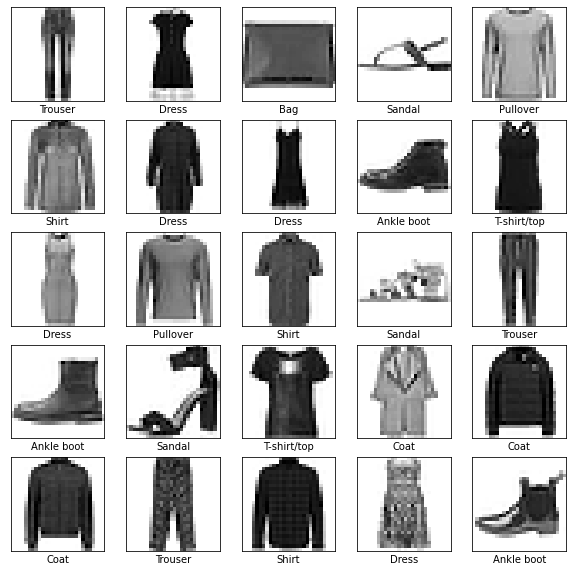

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
	  tf.keras.layers.AveragePooling2D(pool_size=(2, 2), stridespadding='valid',
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
	  tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='swish'),
    tf.keras.layers.Dense(600, activation='swish'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                     

In [ ]:
save_path = "/Users/rafalrazny/ML/20_module/train_fashion.ckpt"
checkpoint_dir = os.path.dirname(save_path)
fashion_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
adamek = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

model.compile(optimizer=adamek,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, shuffle=1000, batch_size=32, callbacks=[fashion_callback], validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1687/1688 [============================>.] - ETA: 0s - loss: 0.3702 - accuracy: 0.8653
Epoch 1: saving model to /Users/rafalrazny/ML/20_module/train_fashion.ckpt
1688/1688 [==============================] - 85s 50ms/step - loss: 0.3702 - accuracy: 0.8654 - val_loss: 0.2944 - val_accuracy: 0.8897
Epoch 2/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.2534 - accuracy: 0.9065
Epoch 2: saving model to /Users/rafalrazny/ML/20_module/train_fashion.ckpt
1688/1688 [==============================] - 89s 53ms/step - loss: 0.2534 - accuracy: 0.9065 - val_loss: 0.2564 - val_accuracy: 0.9085
Epoch 3/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9223
Epoch 3: saving model to /Users/rafalrazny/ML/20_module/train_fashion.ckpt
1688/1688 [==============================] - 86s 51ms/step - loss: 0.2100 - accuracy: 0.9223 - val_loss: 0.2308 - val_accuracy: 0.9138
Epoch 4/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.1862 - accura

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)
print('\nTest accuracy:', test_acc)

188/188 [==============================] - 3s 14ms/step - loss: 0.3310 - accuracy: 0.9152

Test accuracy: 0.9151666760444641


In [ ]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

4

In [ ]:
y_test[0]

2

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

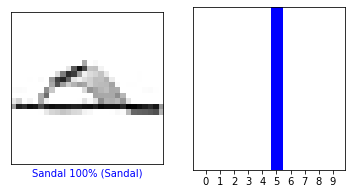

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

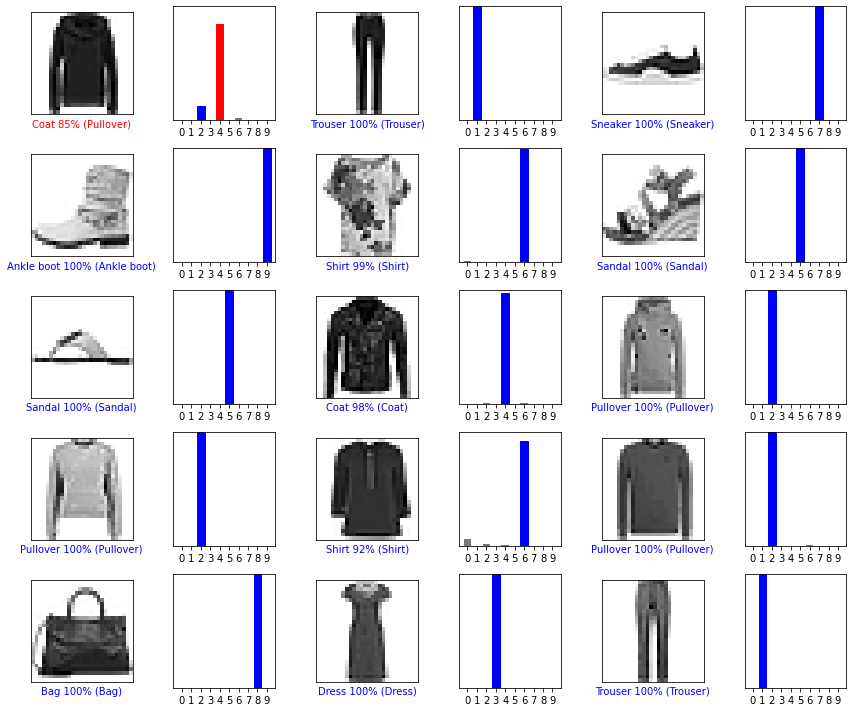

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

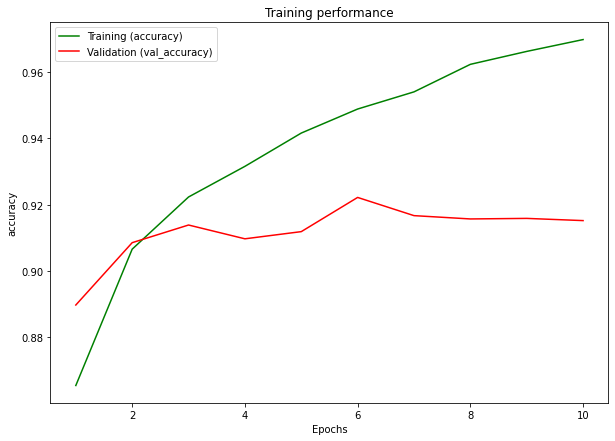

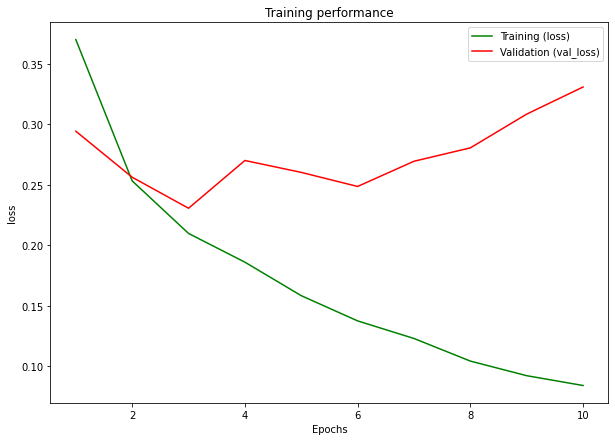

In [ ]:
history_dict = history.history

def plot_train_instrumentation(epochs, data, train_param, val_param):
    
    plt.figure(figsize=(10,7))
    
    plt.plot(epochs, data[train_param], 'g', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'red', label=f'Validation ({val_param})')
    
    plt.title("Training performance")
    plt.xlabel('Epochs')
    plt.ylabel(train_param)
    
    plt.legend()
    plt.show()

epochs = range(1, len(history_dict['accuracy'])+1)

plot_train_instrumentation(epochs, history_dict, 'accuracy', 'val_accuracy')
plot_train_instrumentation(epochs, history_dict, 'loss', 'val_loss')

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0
)
datagen.fit(X_train.reshape(54000, 28, 28, 1))
history_new = model.fit(datagen.flow(X_train.reshape(54000, 28, 28, 1), y_train),
         validation_data=datagen.flow(X_test.reshape(6000, 28, 28, 1), y_test), epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1688/1688 [==============================] - 106s 62ms/step - loss: 0.5107 - accuracy: 0.8128 - val_loss: 0.4457 - val_accuracy: 0.8352
Epoch 2/10
1688/1688 [==============================] - 106s 63ms/step - loss: 0.3948 - accuracy: 0.8540 - val_loss: 0.3938 - val_accuracy: 0.8462
Epoch 3/10
1688/1688 [==============================] - 105s 62ms/step - loss: 0.3664 - accuracy: 0.8648 - val_loss: 0.4100 - val_accuracy: 0.8458
Epoch 4/10
1688/1688 [==============================] - 106s 63ms/step - loss: 0.3472 - accuracy: 0.8709 - val_loss: 0.3567 - val_accuracy: 0.8707
Epoch 5/10
1688/1688 [==============================] - 104s 62ms/step - loss: 0.3278 - accuracy: 0.8780 - val_loss: 0.3490 - val_accuracy: 0.8700
Epoch 6/10
1688/1688 [==============================] - 106s 63ms/step - loss: 0.3178 - accuracy: 0.8838 - val_loss: 0.3350 - val_accuracy: 0.8728
Epoch 7/10
1688/1688 [==============================] - 106s 63ms/step - loss: 0.3105 - accuracy: 0.8854 - val_loss: 0.4327 - val

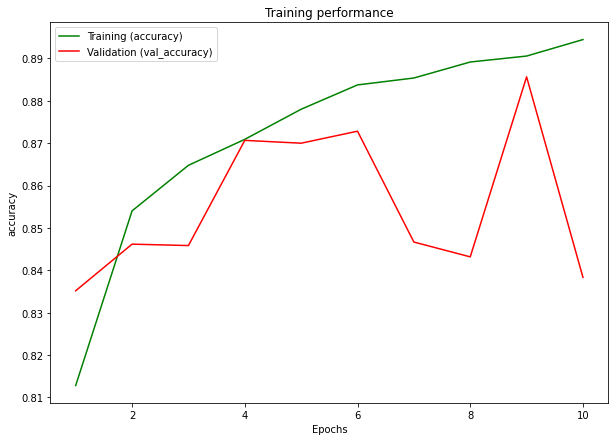

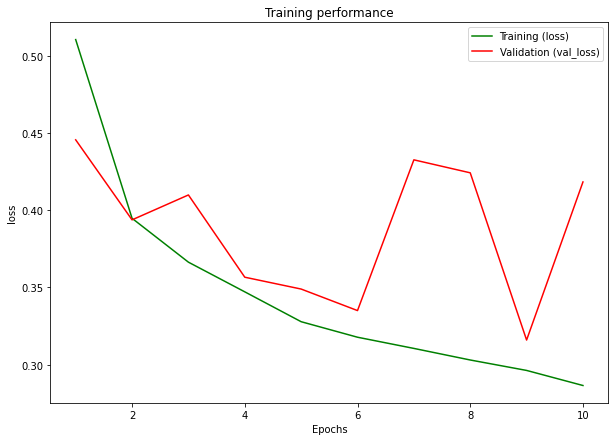

In [ ]:
history_dict_2 = history_new.history
plot_train_instrumentation(epochs, history_dict_2, 'accuracy', 'val_accuracy')
plot_train_instrumentation(epochs, history_dict_2, 'loss', 'val_loss')